In [48]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 12px;
}

div.output_area pre {
    font-size: 12px;
}
</style>

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [3]:
import datetime

# Phân tích EDA cho đơn hàng

# 0. Load dữ liệu

In [4]:
# Header: order_id,user_id,eval_set,order_number,order_dow,
#         order_hour_of_day,days_since_prior_order
start_time = datetime.datetime.now()

csv_data = np.genfromtxt('data-instacart/orders.csv', skip_header=1, 
                         delimiter=',', usecols=[0,1,3,4,5,6])

end_time = datetime.datetime.now()
print("Đã load xong!")
print("Thời gian:", end_time - start_time)

Đã load xong!
Thời gian: 0:00:14.219067


**Kiểm tra dữ liệu**

In [5]:
print(csv_data.shape)

(3421083, 6)


In [6]:
# Kiểm tra thử 5 dòng đầu
csv_data[0:5]

array([[2539329.,       1.,       1.,       2.,       8.,      nan],
       [2398795.,       1.,       2.,       3.,       7.,      15.],
       [ 473747.,       1.,       3.,       3.,      12.,      21.],
       [2254736.,       1.,       4.,       4.,       7.,      29.],
       [ 431534.,       1.,       5.,       4.,      15.,      28.]])

In [7]:
# Kiểm tra thử một cột
csv_data.T[-1]

array([nan, 15., 21., ..., 18.,  7., 30.])

In [9]:
np.count_nonzero(np.isnan(csv_data.T[-1]))

206209

# 1. Phân tích mô tả
(đơn biến, không dùng đồ thị)

## 1.1. Phân tích theo giờ mua hàng

**Lấy ra cột về giờ mua hàng (cột 4)**

In [10]:
# order_hour_of_day
order_hour_of_day = csv_data[:,4].astype(np.uint8)
order_hour_of_day[0:10]

array([ 8,  7, 12,  7, 15,  7,  9, 14, 16,  8], dtype=uint8)

In [11]:
# Kiểm tra thử số giá trị duy nhất
print(np.unique(order_hour_of_day))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


**Dùng hàm `np.unique` để đếm số đơn theo giờ**

In [12]:
# Đếm số đơn theo giờ
values, counts = np.unique(order_hour_of_day, return_counts=True)
print(values)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 22758  12398   7539   5474   5527   9569  30529  91868 178201 257812
 288418 284728 272841 277999 283042 283639 272553 228795 182912 140569
 104292  78109  61468  40043]


In [13]:
# Trung bình số đơn theo giờ
print("Trung bình số đơn mỗi giờ:", np.mean(counts))
print("Trung bình số đơn mỗi giờ:", order_hour_of_day.size/24)

Trung bình số đơn mỗi giờ: 142545.125
Trung bình số đơn mỗi giờ: 142545.125


In [14]:
# Tìm các giá trị max-min
print("Nhiều đơn nhất:", np.max(counts))    # Mode của số đơn hàng trong ngày
print("Ít đơn nhất:", np.min(counts))

Nhiều đơn nhất: 288418
Ít đơn nhất: 5474


In [15]:
# Thử tìm giá trị mode bằng hàm 'stats.mode'
stats.mode(order_hour_of_day)

ModeResult(mode=array([10], dtype=uint8), count=array([288418]))

## 1.2. Phân tích theo ngày mua hàng trong tuần

**Lấy ra cột `order_dow` (cột 3)**

In [16]:
order_dow = csv_data[:,3].astype(np.uint8)

In [17]:
print(order_dow.shape)
print(np.unique(order_dow))

(3421083,)
[0 1 2 3 4 5 6]


**Dùng hàm `np.unique` để đếm số đơn theo ngày trong tuần**

In [18]:
# Đếm số đơn theo ngày trong tuần
values, counts = np.unique(order_dow, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6]
[600905 587478 467260 436972 426339 453368 448761]


In [19]:
# Trung bình số đơn theo ngày trong tuần
print("Trung bình số đơn mỗi ngày trong tuần:", np.mean(counts))
print("Trung bình số đơn mỗi ngày trong tuần:", order_dow.size/7)

Trung bình số đơn mỗi ngày trong tuần: 488726.14285714284
Trung bình số đơn mỗi ngày trong tuần: 488726.14285714284


In [20]:
print("Ít đơn nhất:", np.min(counts)) # Min của số đơn hàng theo ngày trong tuần
print("Nhiều đơn nhất:", np.max(counts))    # Max  của số đơn hàng theo ngày trong tuần

Ít đơn nhất: 426339
Nhiều đơn nhất: 600905


# 2. Phân tích theo các câu hỏi

## 2.1) Thời điểm nào trong ngày thường có nhiều đơn hàng nhất?
Vẽ biểu đồ phân bố đơn hàng theo giờ trong ngày{.unnumbered}

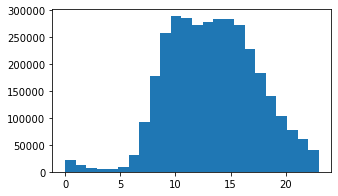

In [21]:
# Cách đơn giản nhất: vẽ histogram của cột order_hour_of_day
fig,ax = plt.subplots(figsize=(5,3), num=1)
ax.hist(order_hour_of_day, bins=24)
plt.show()

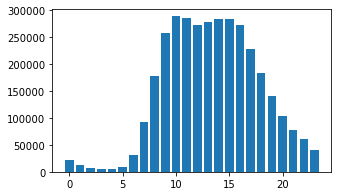

In [22]:
# Hoặc vẽ biểu đồ cột của các giá trị đếm được
values, counts = np.unique(order_hour_of_day, return_counts=True)
fig,ax = plt.subplots(figsize=(5,3), num=1)
ax.bar(values, counts)
plt.show()

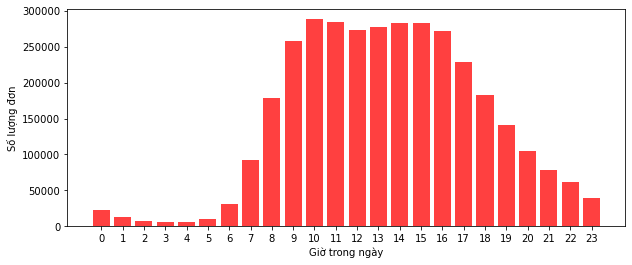

In [23]:
# Chỉnh sửa lại cho đẹp hơn
fig,ax = plt.subplots(figsize=(10,4), num=1)

ax.bar(values, counts, alpha=0.75, color='red')

xtick_labels = np.arange(24)
ax.set_xticks(values)
ax.set_xlabel("Giờ trong ngày")
ax.set_ylabel("Số lượng đơn")

plt.show()

**Kết luận?**

## 2.2) Thời điểm nào trong tuần thường có nhiều đơn hàng nhất? {.unnumbered}
Vẽ biểu đồ phân bố đơn hàng theo ngày trong tuần

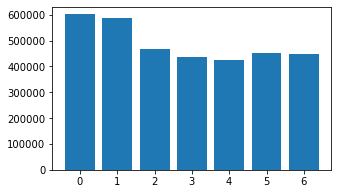

In [24]:
values, counts = np.unique(order_dow, return_counts=True)
fig,ax = plt.subplots(figsize=(5,3), num=1)
ax.bar(values, counts)
plt.show()

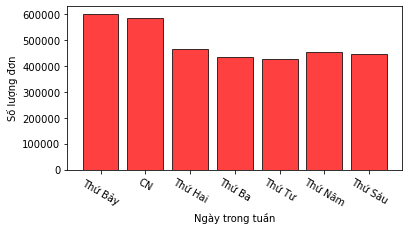

In [25]:
week_days = ['Thứ Bảy', 'CN', 'Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu']
fig,ax = plt.subplots(figsize=(6,3), num=1)
ax.bar(values, counts, alpha=0.75, width=0.8,
       color='red', edgecolor='black', linewidth=1.0)

ax.set_xticks(values)
ax.set_xticklabels(week_days, rotation=-30)

ax.set_xlabel("Ngày trong tuần")
ax.set_ylabel("Số lượng đơn")

plt.show()

## 2.3. Mỗi khách hàng thường có số đơn hàng là bao nhiêu?

**Cần tính số lượng khách hàng theo số đơn hàng mỗi khách đã mua**
<br>
Ví dụ:
- Số khách hàng mua 3 đơn: 100 người
- Số khách hàng mua 5 đơn: 120 người
- ...

**Lấy ra cột `customer_id_order` (Cột 1)**

In [26]:
customer_id_order = csv_data[:,1].astype(int)
customer_id_order

array([     1,      1,      1, ..., 206209, 206209, 206209])

In [27]:
# Đếm bằng hàm 'np.unique()'
values, order_per_cus_counts = np.unique(customer_id_order, return_counts=True)
print(values.size)
print(order_per_cus_counts.size)

206209
206209


In [28]:
# Thử in ra và kiểm tra
print(values)
print(order_per_cus_counts)

[     1      2      3 ... 206207 206208 206209]
[11 15 13 ... 17 50 14]


**Một số thống kê mô tả**

In [29]:
print("Số đơn ít nhất mà 1 KH đã mua:", np.min(order_per_cus_counts)) 
print("Số đơn nhiều nhất mà 1 KH đã mua:", np.max(order_per_cus_counts))
print("Số đơn trung bình mà 1 KH đã mua:", np.mean(order_per_cus_counts))
print("Giá trị trung vị của số đơn:", np.median(order_per_cus_counts))
print("Giá trị mode của số đơn:", stats.mode(order_per_cus_counts))

Số đơn ít nhất mà 1 KH đã mua: 4
Số đơn nhiều nhất mà 1 KH đã mua: 100
Số đơn trung bình mà 1 KH đã mua: 16.590367054784224
Giá trị trung vị của số đơn: 10.0
Giá trị mode của số đơn: ModeResult(mode=array([4], dtype=int64), count=array([23986]))


**Vẽ biểu đồ: histogram**

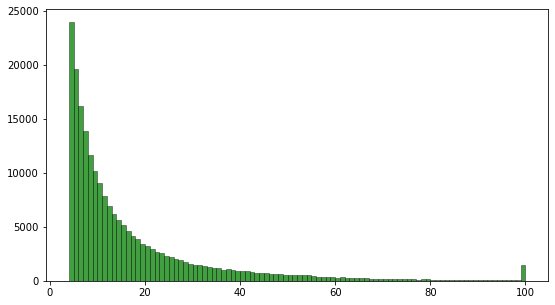

In [35]:
fig,ax = plt.subplots(figsize=(9,5), num=1)
n, bins, edges = ax.hist(order_per_cus_counts, bins=96,
                         color='green', alpha=.75, edgecolor='black', linewidth=0.5)
plt.show()

In [31]:
# Tạo nhãn trên trục x
labels = [4] + list(np.arange(10,105,5))
print(labels)

[4, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


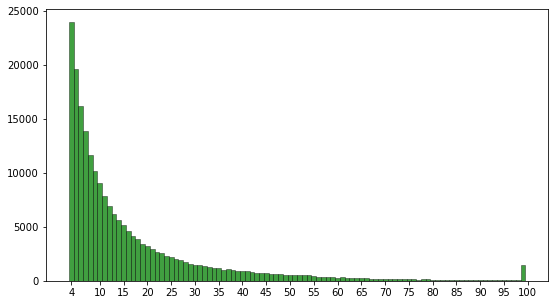

In [34]:
fig,ax = plt.subplots(figsize=(9,5), num=1)
ax.hist(order_per_cus_counts, bins=96, align='left',
        color='green', alpha=.75, edgecolor='black', linewidth=0.5)
ax.set_xticks(labels)
plt.show()

## 2.4. Thường sau bao nhiêu ngày khách hàng lại re-order?

**Vẽ biểu đồ số đơn hàng theo quãng thời gian re-order**

**Lấy ra cột `reorder_days` và bỏ các giá trị NaN**

In [36]:
reorder_days = csv_data.T[-1]
# reorder_days = csv_data.T[-1].astype(np.uint8)
print(reorder_days)

[nan 15. 21. ... 18.  7. 30.]


In [37]:
# Thử kiểm tra với phép so sánh bằng và hàm isnan()
print(reorder_days == np.nan)
print(np.isnan(reorder_days))

[False False False ... False False False]
[ True False False ... False False False]


In [38]:
# Có thể sử dụng hàm np.invert() để đảo giá trị True/False
# Cũng có thể dùng dấu Tidle (~) thay cho hàm np.invert()
np.invert(np.isnan(reorder_days))

array([False,  True,  True, ...,  True,  True,  True])

**Lấy ra phần không-NAN của cột `reorder_days`**

In [39]:
# Gán lại biến 'reorder_days'
# Lưu ý: cần chuyển thành kiểu uint8
reorder_days = reorder_days[np.invert(np.isnan(reorder_days))].astype(np.uint8)
print(reorder_days)

[15 21 29 ... 18  7 30]


In [40]:
values, counts = np.unique(reorder_days, return_counts=True)
print(values)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 67755 145247 193206 217005 221696 214503 240013 320608 181717 118188
  95186  80970  76146  83214 100230  66579  46941  39245  35881  34384
  38527  45470  32012  23885  20712  19234  19016  22013  26777  19191
 369323]


**Vẽ lên biểu đồ**

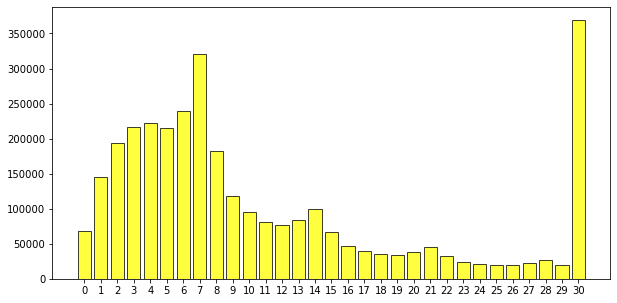

In [41]:
fig,ax = plt.subplots(figsize=(10,5), num=1)
ax.bar(values, counts,
       color='yellow', alpha=.75, edgecolor='black')
ax.set_xticks(values)
plt.show()

# Mở rộng và nâng cao

**Sau 30 ngày, đa số khách hàng đã order bao nhiêu lần?**

**Cần lấy ra cột số lần order (cột 2) của những lần reorder sau 30 ngày**

In [42]:
reorder_days == 30

array([False, False, False, ..., False, False,  True])

In [44]:
order_numbers = csv_data.T[2]
reorder30 = order_numbers[csv_data.T[-1] == 30]
print(reorder30.shape)

(369323,)


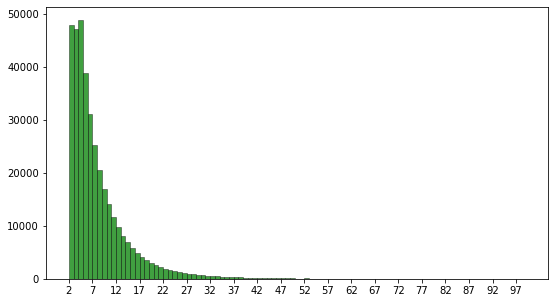

In [47]:
fig,ax = plt.subplots(figsize=(9,5), num=1)
count, bins, edges = ax.hist(reorder30, bins=97,
                             color='green', alpha=.75, edgecolor='black', linewidth=0.5)

# Tạo nhãn trên trục x:
# labels = [2] + list(np.arange(5,70,5))
# ax.set_xticks(labels)
ax.set_xticks([bins[i] for i in range(0,bins.size,5)])

plt.show()